<center> <h1>Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow </h1> </center>   

<center><hr> <h2>  Chapter 1  </h2> </center>



## What is Machine Learning?  

* field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel, 1959)  
* A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E (tom Mitchell, 1997)  

## Why Use Machine Learning?  
* ![](images/1ml-approach.png)  
* ![](images/2ml-approach-automated.png)  
* Automatic (can adapt to new data too)
* Able to read and analyze big data. 

## Types of ML Systems  

### Supervised Learning  
* training data has *labels* (desired solutions)  
* *Classification*
* *Prediction*
* Examples of methods: 
  * k-Nearest Neighbors  
  * Linear Regression  
  * Logistic Regression  
  * SVMs  
  * Decision Trees and Random FOrests  
  * Neural Networks  

### Unsupervised Learning  
* traning data has *no labels*  
* Examples:  
  * Clustering (Group similar datapoints together)  
    * K-Means  
    * DBSCAN  
    * Hierarchical Cluster Analysis  
  * Anomaly detection and novelty detection (Finds datapoints that are unlike the training data)  
    * One-class SVM   
    * Isolation Forest  
  * Visualization and dimensionality reduction (Shows general structures and patterns of data)  
    * Principal Component Analysis  
    * Kernel PCA  
    * Locally-Linear Embedding (LLE)  
    * t-distributed Stochastic Neighbor Embedding (t-SNE)  
  * Association rule learning (finds relationships between attributes)  
    * Apriori  
    * Eclat  

### Semisupervised learning  
* training data has *some labels*  

### Reinforcement Learning  
* Markov-decision process (agent, state, action, rewards)  
* Learns from several simulations. Policy function iteration (need info on environment), Q-learning (doesn't need info on environment)  

## Batch and Online Learning  

### Batch Learning  

* Model must be trained on ALL data  
* Cannot incorporate new data, must retrain model on all data  
* Requires significant memory, disk space, time for computation  
  
### Online Learning  
* System is trained incrementally by feeding individual datapoints or *mini-batches*. 
![](images/online.png)  
* Big data can be trained by storing in remote server, breaking into pieces and training one by one (or train on cloud)  
![](images/4online-outcore.png)
* *learning rate* = specifies how fast model forgets old data and adapts to new data  
* If model is fed large amounts of bad data, performance declines, so must be weary! 
  

## Generalizing: Instance-Based Versus Model-Based Learning  

Models must generalize to new data that it wasn't trained on. 

### Instance-based learning  

* Compute *similarity* of new datapoints with training data and ouputs result.  

### Model-based learning  
* Estimates a *model* (or function that inputs independent variables and outputs dependent variables).  

In [2]:
# Requirements:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import os
import urllib.request

# configure matplotlib settings
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# download data 
datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

# aux functions 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]



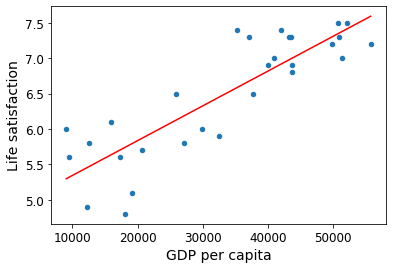

[[5.96242338]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
# read the data
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
#plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)
b0 = model.intercept_
b1 = model.coef_

plt.plot(X, b0 + b1 * X, 'r')
plt.show()

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]